### Data Preperation
### Term Project - MileStone 5
### Submitter - Himanshu Singh
### Merging the Data and Storing in a Database/Visualizing Data

## Step 1 - Adding the .CSV data to the database with table name csvdata

In [59]:
# We got the Latitude and Longitude level info in covid_dataset. It also has data from Jan 22 to March 24 2021.
# We got now Weekly Covid Cases and Weekly Covid Deaths information from https://ourworldindata.org/search?q=covid+data
# We merged the data in output_data2.csv and has stored the extracted API info in the same file (Due to 13300 rows of records and API limitation the data is stored in the same file)


# Loading the data frame from the file created in MileStone 2 and Milestone 4 (Due to API limit of 2000, I am still fetching data every day)
import pandas as pd
import sqlite3
from pandas.conftest import ordered

# Define the path to the .csv file
file_path = 'output_data2.csv'

# Load the data into a pandas DataFrame
try:
    # Reading the file
    df = pd.read_csv(file_path)
    print("Data loaded successfully!")
    # Reading first 10 rows
    #print(df.head(10)) # Print the first 10 rows of the DataFrame
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


# --- Configuration ---
CSV_FILE = 'output_data2.csv'
DB_FILE = 'Himanshu.db'
TABLE_NAME = 'csvdata'
NUM_COLUMNS_TO_LOAD = 22

# --- Main Loading Process ---

try:

    df_header = pd.read_csv(CSV_FILE, nrows=0)
    columns_to_keep = df_header.columns[:NUM_COLUMNS_TO_LOAD].tolist()


        # Read the CSV, using a lambda function with usecols to select
        # columns where the column index (i) is less than the desired limit.
    df = pd.read_csv(CSV_FILE, usecols=columns_to_keep)

    # Connect to the SQLite database
    #    If the file doesn't exist, it will be created.
    conn = sqlite3.connect(DB_FILE)
    cursor = conn.cursor()
    print(f"Connected to SQLite database: {DB_FILE}")

    # Write the DataFrame to an SQLite table
    #    'if_exists': 'replace' will overwrite the table if it exists.
    #    Other options: 'append' or 'fail'.
    df.to_sql(TABLE_NAME, conn, if_exists='replace', index=False)
    print(f"Successfully loaded data into table: {TABLE_NAME}")

    # Verify the data load (checking row count)
    verification_query = f"SELECT COUNT(*) FROM {TABLE_NAME};"
    cursor.execute(verification_query)
    count = cursor.fetchone()[0]
    print(f"Verification: {count} rows found in {TABLE_NAME}.")

    # --- Verification ---
    print("\nVerifying data in the new SQLite table...")
    verification_query = f"SELECT * FROM {TABLE_NAME} LIMIT 5;"
    verification_data = pd.read_sql_query(verification_query, conn)

    print("Sample data from SQLite table columns:")
    print(verification_data.to_markdown(index=False))

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # 5. Close the database connection
    if 'conn' in locals() and conn:
        conn.close()
        print("Connection closed.")






Data loaded successfully!
Connected to SQLite database: Himanshu.db
Successfully loaded data into table: csvdata
Verification: 13032 rows found in csvdata.

Verifying data in the new SQLite table...
Sample data from SQLite table columns:
| Province/State   | Country/Region   |   lat |   long |      pop |   urbanpop |   density |   medianage |   smokers |   tests |   testpop |   health_exp_pc |   hospibed |   Year |   Month | Code   | Entity      |   Weekly deaths |   Weekly cases | Date_String   | New_Date   |   score |
|:-----------------|:-----------------|------:|-------:|---------:|-----------:|----------:|------------:|----------:|--------:|----------:|----------------:|-----------:|-------:|--------:|:-------|:------------|----------------:|---------------:|:--------------|:-----------|--------:|
|                  | Afghanistan      |    33 |     65 | 38928346 |    9732086 |        60 |          18 |      -999 |    -999 |      -999 |              60 |        0.5 |   2021 |      

## Step 2 - Loading the API fetched data which is current Stored in .csv to data table named apidata

In [60]:
import pandas as pd
import sqlite3
import os

# --- Configuration ---
CSV_FILE = 'output_data2.csv'
DB_FILE = 'Himanshu.db'
TABLE_NAME = 'apidata'

# 1. COLUMNS to PICK from CSV
COLUMNS_TO_SELECT = ['lat', 'long', 'Date_String', 'temperature','feels_like','humidity']

# --- Main Loading Process ---
try:
    # 2. READ CSV: Use 'usecols' to read ONLY the desired columns
    df_filtered = pd.read_csv(CSV_FILE, usecols=COLUMNS_TO_SELECT)
    print(f"Read CSV and filtered to columns: {list(df_filtered.columns)}")

    # 3. CONNECT TO SQLITE
    #    If the file doesn't exist, it will be created.
    conn = sqlite3.connect(DB_FILE)
    print(f"Connected to SQLite database: {DB_FILE}")

    # 4. WRITE TO SQLITE
    #    The DataFrame (with only the selected columns) is written.
    #    'if_exists': 'replace' will overwrite the table if it exists.
    df_filtered.to_sql(TABLE_NAME, conn, if_exists='replace', index=False)
    print(f"Successfully loaded data into table: {TABLE_NAME}")

    # --- Optional: Verification ---
    print("\nVerifying data in the new SQLite table...")
    verification_query = f"SELECT * FROM {TABLE_NAME} LIMIT 5;"
    verification_data = pd.read_sql_query(verification_query, conn)

    print("Sample data from SQLite table columns:")
    print(verification_data.to_markdown(index=False))

except FileNotFoundError:
    print(f"ERROR: The CSV file '{CSV_FILE}' was not found. Please check your path.")
except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # 5. Close the database connection
    if 'conn' in locals() and conn:
        conn.close()
        print("\nConnection closed.")

Read CSV and filtered to columns: ['lat', 'long', 'Date_String', 'temperature', 'feels_like', 'humidity']
Connected to SQLite database: Himanshu.db
Successfully loaded data into table: apidata

Verifying data in the new SQLite table...
Sample data from SQLite table columns:
|   lat |   long | Date_String   |   temperature |   feels_like |   humidity |
|------:|-------:|:--------------|--------------:|-------------:|-----------:|
|    33 |     65 | 2021-07-01    |         26.84 |        30    |         87 |
|    33 |     65 | 2021-05-01    |         21.1  |        21.22 |         75 |
|    33 |     65 | 2024-09-01    |         27.71 |        30.86 |         76 |
|    33 |     65 | 2020-04-01    |         16.7  |        16.67 |         86 |
|    33 |     65 | 2020-03-01    |         15.51 |        14.84 |         66 |

Connection closed.


## Step 3 - Loading the data from the Webscaping in table Webdata

In [61]:
from bs4 import BeautifulSoup
import pandas as pd
import cloudscraper as cs

# to avoid cloudflare or 403 error using cloudscraper
scraper = cs.create_scraper()
URL = "https://en.wikipedia.org/wiki/List_of_countries_by_total_health_expenditure_per_capita"
response = scraper.get(f"{URL}")
soup = BeautifulSoup(response.content, 'html.parser')

number_of_tables = soup.find_all("table")
print(f"Number of tables on the webpage {len(number_of_tables)}")
#print(soup.prettify())
# Find the main GDP table. Based on the page structure, it is the
# first major 'wikitable sortable sticky-header-multi static-row-numbers'
health_table = soup.find_all('table', {'class': 'wikitable sortable defaultright static-row-numbers sticky-table-head'})

# Check if the table was found
if health_table:
    print("Main Health table found successfully.")
else:
    print("Could not find the main Health table.")


first_column_data = []
second_column_data = []
third_column_data = []
#fourth_column_data = []

# 4. Iterate through each table row (<tr>)
for row in health_table[0].find_all('tr'):
    # 5. Find all table data cells (<td>) in the current row
    cells = row.find_all(['td', 'th']) # Include 'th' for potential header rows
    # 6. Check if a cell exists and append the text of the first one
    if cells:
      # The first element in the 'cells' list is the first column
        first_column_data.append(cells[0].get_text(strip=True))
        second_column_data.append(cells[1].get_text(strip=True))
        third_column_data.append(cells[2].get_text(strip=True))
        #fourth_column_data.append(cells[3].get_text(strip=True))


second_column_data_pd= pd.Series(second_column_data)
second_column_data_pd= second_column_data_pd.str.replace(',', '', regex=False)


# Create a dictionary where keys are the column names and values are the lists
datasource1 = {
    'Country': first_column_data,
    'PPP': second_column_data_pd,
    'Year': third_column_data

}

# Forming in one dataframe
df_source1 = pd.DataFrame(datasource1)


# The value to delete
value_to_delete = 'Location'

# Create a new DataFrame (df_filtered) by selecting all rows
# where the 'Location' column is NOT equal to the value_to_delete.
df_filtered = df_source1[df_source1['Country'] != value_to_delete]


#df_filtered['PPP'] = df_filtered['PPP'].astype(float)
df_filtered.loc[:, 'PPP'] = df_filtered['PPP'].astype(int)

# --- Configuration ---
df_filtered = df_filtered
DB_FILE = 'Himanshu.db'
TABLE_NAME = 'webdata'


# --- Main Loading Process ---
try:
    # 2. READ CSV: Use 'usecols' to read ONLY the desired columns
    df_filtered = df_filtered

    # 3. CONNECT TO SQLITE
    #    If the file doesn't exist, it will be created.
    conn = sqlite3.connect(DB_FILE)
    print(f"Connected to SQLite database: {DB_FILE}")

    # 4. WRITE TO SQLITE
    #    The DataFrame (with only the selected columns) is written.
    #    'if_exists': 'replace' will overwrite the table if it exists.
    df_filtered.to_sql(TABLE_NAME, conn, if_exists='replace', index=False)
    print(f"Successfully loaded data into table: {TABLE_NAME}")

    # --- Optional: Verification ---
    print("\nVerifying data in the new SQLite table...")
    verification_query = f"SELECT * FROM {TABLE_NAME} LIMIT 5;"
    verification_data = pd.read_sql_query(verification_query, conn)

    print("Sample data from SQLite table columns:")
    print(verification_data.to_markdown(index=False))

except FileNotFoundError:
    print(f"ERROR: The dataframe file '{df_filtered}' was not found. Please check your path.")
except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # 5. Close the database connection
    if 'conn' in locals() and conn:
        conn.close()
        print("\nConnection closed.")


Number of tables on the webpage 3
Main Health table found successfully.
Connected to SQLite database: Himanshu.db
Successfully loaded data into table: webdata

Verifying data in the new SQLite table...
Sample data from SQLite table columns:
| Country     |   PPP |   Year |
|:------------|------:|-------:|
| Afghanistan |   383 |   2022 |
| Albania     |  1186 |   2022 |
| Algeria     |   547 |   2022 |
| Andorra     |  5641 |   2023 |
| Angola      |   217 |   2022 |

Connection closed.


## Step 2a - Extra step being performed to fetch API data and update the loaded table in step 2

In [180]:
# The API will need three parameters
# Latitude
# longitude
# UTC Time

# The API return the temperature in Kelvin which should be converted to Celsius

import requests
from datetime import datetime, timezone
import numpy as np
import pandas as pd
import sqlite3
with sqlite3.connect("Himanshu.db") as conn:cursor = conn.cursor()


def kelvin_to_celsius(kelvin):
  """
  Converts a temperature from Kelvin to Celsius.

  Args:
    kelvin: The temperature in Kelvin (float or int).

  Returns:
    The temperature in Celsius (float).
  """
  celsius = kelvin - 273.15
  return round(celsius,2)

# --- Configuration ---

API_KEY = "84fd858343ee131cad3fe6483cc8e8e4"  # Can be put in encrypted way like in environment variable
BASE_URL = "https://api.openweathermap.org/data/3.0/onecall/timemachine"


sql = "Select * from apidata where LTRIM(RTRIM(temperature)) is null limit 100;"
cursor.execute(sql)
results = cursor.fetchall()


for row in results:
    lat = row[0]
    lon = row[1]
    datestring = row[2]
    dt_object = datetime.strptime(datestring, '%Y-%m-%d')
    print(lat, lon, dt_object)

    res = dt_object.replace(tzinfo=timezone.utc).timestamp()
    res= int(res)

    # --- Construct the API Request URL ---
# We use parameters (params) to pass the city co-ordinates, API key, and units (metric for Celsius)
    params = {
        'lat': lat,
        'lon': lat,
        'dt': res,
        'appid': API_KEY
    }
    #is_null_count = row[3].isna().sum()
    # --- Make the API Call ---
    try:
        # Since we can make only 1000 free calls, I am running the API everyday to get the data for 950 rows and storing in file. Same file is read next day and the values which are still blank are updated on next day.
        # For submission I got 10 calls to show the output in console.
        if row[3] is None:
            response = requests.get(BASE_URL, params=params)
            #print(params)
            response.raise_for_status() # Raise an exception for bad status codes (4xx or 5xx)

    # --- Process the JSON Response ---
            data = response.json()
            #print(data)
        # Check if the request was success
            if data.get("cod") != 404:
        # Extract relevant information
                main_data = data['data']
                weather_data = main_data[0]

                temp_response = kelvin_to_celsius(weather_data['temp'])
                feels_like_response = kelvin_to_celsius(weather_data['feels_like'])
                humidity_response = weather_data['humidity']

                try:
                # 2. Connect to the database
                    conn = sqlite3.connect('Himanshu.DB')
                    cursor = conn.cursor()

                # 3. Define the SQL UPDATE statement
                # Use '?' placeholders for every variable.
                    sql_update_query = f"""UPDATE apidata SET temperature = ?, feels_like= ?, humidity =?  WHERE lat = ? AND long = ? AND Date_String = ?; """

                # 4. Execute the query with a tuple of variables
                # The order in the tuple must match the order of the '?' placeholders.
                    cursor.execute(sql_update_query, (temp_response, feels_like_response, humidity_response, lat, lon, datestring))

                # 5. Commit the changes
                    conn.commit()
                    print(f"Update successful! {cursor.rowcount} row(s) updated.")

                except sqlite3.Error as e:
                    print(f"An SQLite error occurred: {e}")

                finally:
                    if conn:
                        conn.close()
             # --- Display Results ---

                #print(f"Temperature: {df.loc[index,'temperature']}°C")
                #print(f"Feels Like: {df.loc[index,'feels_like']}°C")
                #print(f"Humidity: {df.loc[index,'humidity'] }%")

            else:
                print(f"Error: Parameters not found.")
        #else :
            #print(f"Error: Will continue tomorrow")

    except requests.exceptions.HTTPError as err:
        print(f"HTTP Error: {err}")
    except requests.exceptions.RequestException as err:
        print(f"An error occurred: {err}")
    except KeyError:
        print("Error: Could not parse all expected data from the API response.")

conn = sqlite3.connect('Himanshu.DB')
cursor = conn.cursor()
sql = "Select COUNT(*) from apidata where LTRIM(RTRIM(temperature)) is null;"
cursor.execute(sql)
results = cursor.fetchall()

df = pd.DataFrame(results)
print("Checking number of records not updated")
print(df.to_string(index=False, header=False))

25.0343 -77.3963 2021-11-01 00:00:00
Update successful! 1 row(s) updated.
25.0343 -77.3963 2024-02-01 00:00:00
Update successful! 1 row(s) updated.
25.0343 -77.3963 2021-08-01 00:00:00
Update successful! 1 row(s) updated.
25.0343 -77.3963 2025-09-01 00:00:00
Update successful! 1 row(s) updated.
25.0343 -77.3963 2021-05-01 00:00:00
Update successful! 1 row(s) updated.
25.0343 -77.3963 2020-10-01 00:00:00
Update successful! 1 row(s) updated.
25.0343 -77.3963 2024-12-01 00:00:00
Update successful! 1 row(s) updated.
25.0343 -77.3963 2023-06-01 00:00:00
Update successful! 1 row(s) updated.
25.0343 -77.3963 2021-12-01 00:00:00
Update successful! 1 row(s) updated.
25.0343 -77.3963 2024-04-01 00:00:00
Update successful! 1 row(s) updated.
25.0343 -77.3963 2024-09-01 00:00:00
Update successful! 1 row(s) updated.
25.0343 -77.3963 2021-10-01 00:00:00
Update successful! 1 row(s) updated.
25.0343 -77.3963 2023-01-01 00:00:00
Update successful! 1 row(s) updated.
25.0343 -77.3963 2021-06-01 00:00:00
U

## Step 4 - To Merge all tables in one dataset

In [66]:
import sqlite3

# Define the database name


# Connect to the SQLite database (creates it if it doesn't exist)

# --- Configuration ---
DB_FILE = 'Himanshu.db'
webdata = 'webdata'
csvdata = 'csvdata'
apidata = 'apidata'

conn = sqlite3.connect(DB_FILE)
cursor = conn.cursor()

# SQL Query using INNER JOINs
triple_join_query = 'SELECT *  FROM webdata AS A LEFT JOIN csvdata AS B ON B.[Country/Region] = A.Country LEFT JOIN apidata AS D ON B.lat = D.lat and B.long = D.long and B.Date_String = D.Date_String;'


# Fetch all results
results = cursor.execute(triple_join_query)
df = pd.DataFrame(results)
print(df)
#for row in results:
 #   print(row[0], row[1], row[2], row[3])

conn.close()


                0    1     2     3            4     5     6           7   \
0      Afghanistan  383  2022  None  Afghanistan  33.0  65.0  38928346.0   
1      Afghanistan  383  2022  None  Afghanistan  33.0  65.0  38928346.0   
2      Afghanistan  383  2022  None  Afghanistan  33.0  65.0  38928346.0   
3      Afghanistan  383  2022  None  Afghanistan  33.0  65.0  38928346.0   
4      Afghanistan  383  2022  None  Afghanistan  33.0  65.0  38928346.0   
...            ...  ...   ...   ...          ...   ...   ...         ...   
12373     Zimbabwe   96  2022  None     Zimbabwe -20.0  30.0  16530000.0   
12374     Zimbabwe   96  2022  None     Zimbabwe -20.0  30.0  16530000.0   
12375     Zimbabwe   96  2022  None     Zimbabwe -20.0  30.0  16530000.0   
12376     Zimbabwe   96  2022  None     Zimbabwe -20.0  30.0  16530000.0   
12377     Zimbabwe   96  2022  None     Zimbabwe -20.0  30.0  16530000.0   

              8      9   ...       21          22          23     24    25  \
0      97

# Visualizations
## Country graph for Weekly Deaths and Weather on Entering Country of your Choice

        0       1         2           3      4     5
0   India       0         6  2020-01-01   9.34  60.0
1   India       0        59  2020-02-01   9.59  53.0
2   India     145      6154  2020-03-01  14.79  32.0
3   India    6059    189599  2020-04-01  21.30  36.0
4   India   25693    920242  2020-05-01  24.15  24.0
5   India   77922   2456629  2020-06-01  26.47  26.0
6   India  124706   6822664  2020-07-01  25.57  23.0
7   India  195832  13332158  2020-08-01  29.11  58.0
8   India  230321  18165827  2020-09-01  27.91  22.0
9   India  179640  14084386  2020-10-01  26.80  24.0
10  India  109572   9174573  2020-11-01  15.59  57.0
11  India   85398   6295246  2020-12-01  14.23  37.0
12  India   41771   3487143  2021-01-01  11.91  42.0
13  India   19875   2404919  2021-02-01   9.09  32.0
14  India   33924   6459979  2021-03-01  12.79  38.0
15  India  258363  39857336  2021-04-01  12.03  35.0
16  India  841112  69045910  2021-05-01  22.29  13.0
17  India  538023  18889825  2021-06-01  26.97

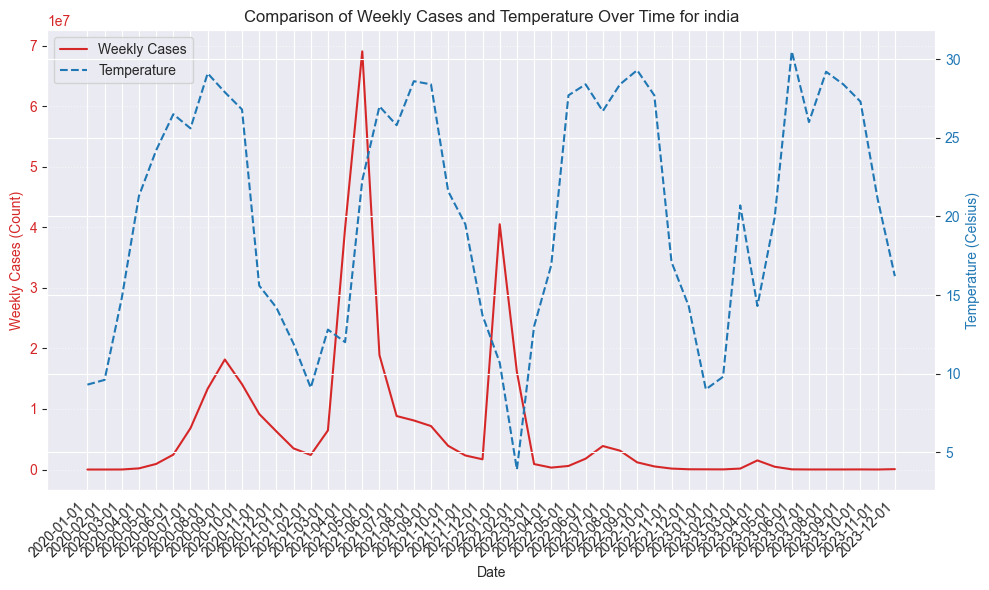

In [181]:
import sqlite3
import matplotlib.pyplot as plt

# enter the country for which the graph is to be checked
country_to_check= input("Please enter the country to check: ")

# --- Configuration ---
DB_FILE = 'Himanshu.db'


conn = sqlite3.connect(DB_FILE)
cursor = conn.cursor()

# SQL Query using INNER JOINs
triple_join_query = ('SELECT A.Country, B.[Weekly deaths], B.[Weekly Cases], B.Date_String, D.temperature, D.humidity  FROM webdata AS A LEFT JOIN csvdata AS B ON B.[Country/Region] = A.Country LEFT JOIN apidata AS D ON B.lat = D.lat and B.long = D.long and B.Date_String = D.Date_String where Lower(A.Country)=? and B.Date_String<"2024-01-01" order by B.Date_String;')
country_tuple = (country_to_check.lower(),)
results = cursor.execute(triple_join_query, country_tuple)

#sql_update_query = f"""UPDATE apidata SET temperature = ?, feels_like= ?, humidity =?  WHERE lat = ? AND long = ? AND Date_String = ?; """


# Fetch all results
#results = cursor.execute(triple_join_query)
df = pd.DataFrame(results)
print(df)
#for row in results:
 #   print(row[0], row[1], row[2], row[3])

conn.close()

#np.random.seed(42)
dates = df[3]
weekly_cases = df[2]
temperature = df[4]

data = {
    'Date': dates,
    'Weekly cases': weekly_cases.round(0).astype(int),
    'Temperature': temperature.round(1),
}
df = pd.DataFrame(data)

# --- 2. Create the Dual Y-Axis Visualization ---

fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary Y-axis (Left) for Covid Cases
color_deaths = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Cases (Count)', color=color_deaths)
line1 = ax1.plot(df['Date'], df['Weekly cases'], label='Weekly Cases', color=color_deaths, linestyle='-')
ax1.tick_params(axis='y', labelcolor=color_deaths)
ax1.grid(axis='y', linestyle=':', alpha=0.6)

# Secondary Y-axis (Right) for Temperature
ax2 = ax1.twinx()  # Create a second axis sharing the X-axis
color_temp = 'tab:blue'
ax2.set_ylabel('Temperature (Celsius)', color=color_temp)
line2 = ax2.plot(df['Date'], df['Temperature'], label='Temperature', color=color_temp, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color_temp)

# Final Plot Aesthetics
plt.title('Comparison of Weekly Cases and Temperature Over Time for ' +country_to_check)
fig.autofmt_xdate(rotation=45) # Rotate dates for readability

# Combine legends from both axes
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()


## Graph for Deaths and HealthCare spending of Countries

               0       1     2
0    Afghanistan   55986   383
1        Albania   25256  1186
2        Algeria   48167   547
3        Andorra    1113  5641
4         Angola   13559   217
..           ...     ...   ...
151   Uzbekistan    7112   716
152    Venezuela   40992   131
153      Vietnam  302442   611
154       Zambia   28546   208
155     Zimbabwe   40180    96

[156 rows x 3 columns]


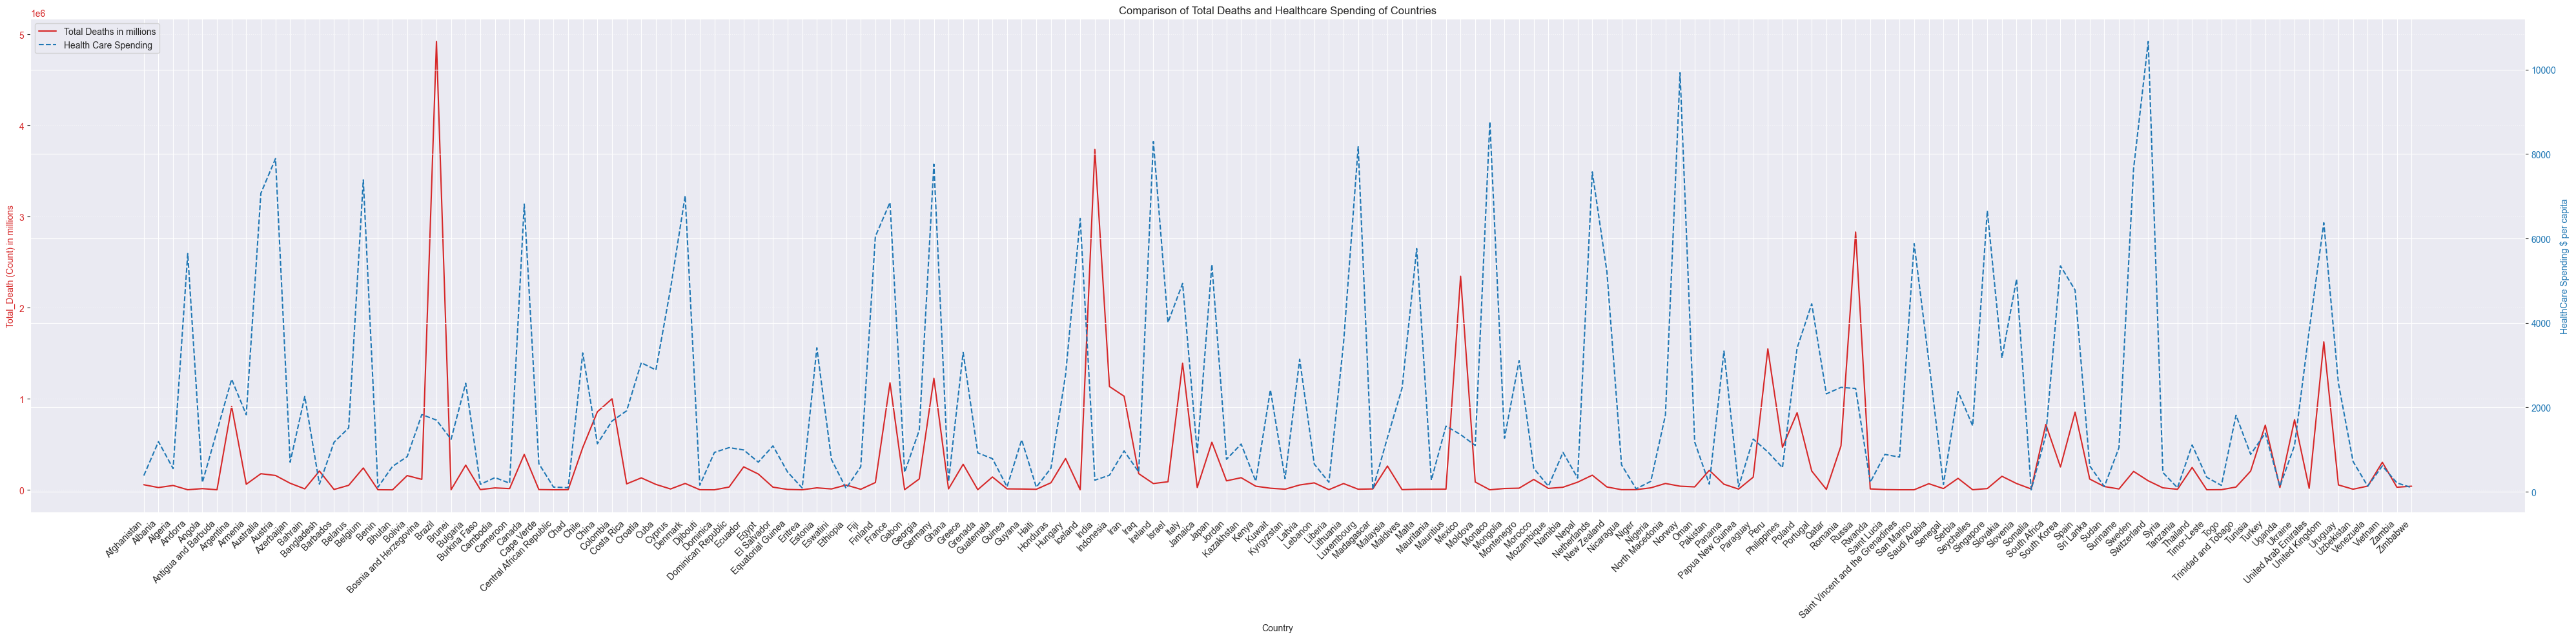

In [103]:
import sqlite3
import matplotlib.pyplot as plt

# Define the database name
# Connect to the SQLite database (creates it if it doesn't exist)

# --- Configuration ---
DB_FILE = 'Himanshu.db'


conn = sqlite3.connect(DB_FILE)
cursor = conn.cursor()

# SQL Query using INNER JOINs
join_query = ('SELECT A.Country, SUM(B.[Weekly deaths]) as [Total Deaths], A.PPP as [Healthcare Spendings]  FROM webdata AS A INNER JOIN csvdata AS B ON B.[Country/Region] = A.Country group by A.Country ;')

results = cursor.execute(join_query)
df = pd.DataFrame(results)
print(df)


conn.close()

#np.random.seed(42)
country = df[0]
total_deaths = df[1]
spendings = df[2]

data = {
    'Country': country,
    'Total_Death': total_deaths.round(0).astype(int),
    'HealthCare_Spending': spendings.round(1),
}
df = pd.DataFrame(data)
df.to_csv('Himanshu.csv')

# --- 2. Create the Dual Y-Axis Visualization ---

fig, ax1 = plt.subplots(figsize=(40, 10))

# Primary Y-axis (Left) for Covid Cases
color_deaths = 'tab:red'
ax1.set_xlabel('Country')
ax1.set_ylabel('Total_Death (Count) in millions', color=color_deaths)
line1 = ax1.plot(df['Country'], df['Total_Death'], label='Total Deaths in millions', color=color_deaths, linestyle='-')
ax1.tick_params(axis='y', labelcolor=color_deaths)
ax1.grid(axis='y', linestyle=':', alpha=0.6)

# Secondary Y-axis (Right) for Temperature
ax2 = ax1.twinx()  # Create a second axis sharing the X-axis
color_temp = 'tab:blue'
ax2.set_ylabel('HealthCare Spending $ per capita', color=color_temp)
line2 = ax2.plot(df['Country'], df['HealthCare_Spending'], label='Health Care Spending', color=color_temp, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color_temp)

# Final Plot Aesthetics
plt.title('Comparison of Total Deaths and Healthcare Spending of Countries')
fig.autofmt_xdate(rotation=45) # Rotate dates for readability

# Combine legends from both axes
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.savefig('Country Data for Death versus Healthcare.pdf',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.show()


## Interactive map for Covid deaths on World Map

In [126]:
import plotly.express as px
import pandas as pd

# --- Configuration ---
DB_FILE = 'Himanshu.db'


conn = sqlite3.connect(DB_FILE)
cursor = conn.cursor()

# SQL Query using INNER JOINs
join_query = ('SELECT B.Code, SUM(B.[Weekly deaths]) as [Total_Deaths], B.[Country/Region]  FROM csvdata AS B group by B.Code , B.[Country/Region] ;')

results = cursor.execute(join_query)
df_covid = pd.DataFrame(results)
df_covid.rename(columns={0: 'CountryCode', 1: 'Total_Deaths', 2:'CountryNames'}, inplace=True)
print(df_covid)


fig = px.choropleth(
    df_covid,
    locations='CountryCode',  # Column with the country codes
    color='Total_Deaths',     # Column with the data used for coloring
    hover_name='CountryNames',     # Column to display when hovering over a country
    #color_continuous_scale=px.colors.sequential.Plasma,
    range_color=(df_covid['Total_Deaths'].min(), df_covid['Total_Deaths'].quantile(0.95)), #
    title='Global COVID-19 Deaths by Country'
)


fig.write_html("covid_death_map.html")

    CountryCode  Total_Deaths  CountryNames
0           ABW          2044         Aruba
1           AFG         55986   Afghanistan
2           AGO         13559        Angola
3           ALB         25256       Albania
4           AND          1113       Andorra
..          ...           ...           ...
185         VEN         40992     Venezuela
186         VNM        302442       Vietnam
187         ZAF        718165  South Africa
188         ZMB         28546        Zambia
189         ZWE         40180      Zimbabwe

[190 rows x 3 columns]


## Visualization to show cumulative death over time for a country

In [178]:

country_to_check= input("Please enter the country to check: ")

# --- Configuration ---
DB_FILE = 'Himanshu.db'


conn = sqlite3.connect(DB_FILE)
cursor = conn.cursor()

# SQL Query using INNER JOINs
join_query = ('SELECT [Country/Region],[Weekly deaths],Date_String  FROM csvdata where LOWER([Country/Region])=?  order by Date_String;')


country_tuple = (country_to_check.lower(),)
results = cursor.execute(join_query, country_tuple)

#sql_update_query = f"""UPDATE apidata SET temperature = ?, feels_like= ?, humidity =?  WHERE lat = ? AND long = ? AND Date_String = ?; """


# Fetch all results
#results = cursor.execute(join_query)
df = pd.DataFrame(results)
print(df)
df[3] = df[1].cumsum()
print(df)

fig = px.line(
    df,
    x=2,          # X-axis is the timeline
    y=3,         # Y-axis is the growing total
    title='Cumulative COVID-19 Deaths Over Time for ' + country_to_check,
    labels={'Cumulative_Deaths': 'Total Deaths'},
    template='plotly_white'
)

# Customize the line for better visualization
fig.update_traces(
    line_color='red',
    line_width=3
)

fig.show()

        0      1           2
0   India      0  2020-01-01
1   India      0  2020-02-01
2   India    145  2020-03-01
3   India   6059  2020-04-01
4   India  25693  2020-05-01
..    ...    ...         ...
64  India     74  2025-05-01
65  India    819  2025-06-01
66  India    266  2025-07-01
67  India    115  2025-08-01
68  India      7  2025-09-01

[69 rows x 3 columns]
        0      1           2        3
0   India      0  2020-01-01        0
1   India      0  2020-02-01        0
2   India    145  2020-03-01      145
3   India   6059  2020-04-01     6204
4   India  25693  2020-05-01    31897
..    ...    ...         ...      ...
64  India     74  2025-05-01  3735722
65  India    819  2025-06-01  3736541
66  India    266  2025-07-01  3736807
67  India    115  2025-08-01  3736922
68  India      7  2025-09-01  3736929

[69 rows x 4 columns]


In [177]:
import country_converter as coco

DB_FILE = 'Himanshu.db'


conn = sqlite3.connect(DB_FILE)
cursor = conn.cursor()

# SQL Query using INNER JOINs
join_query = ('SELECT B.Code, SUM(B.[Weekly deaths]) as [Total_Deaths], B.[Country/Region]  FROM csvdata AS B group by B.Code , B.[Country/Region] ;')

results = cursor.execute(join_query)
df_covid = pd.DataFrame(results)
df_covid.rename(columns={0: 'CountryCode', 1: 'Total_Deaths', 2:'CountryNames'}, inplace=True)
df_covid['Continent']= coco.convert(names=df_covid['CountryCode'],to='continent',src='ISO3' )


# Get the result back as a clean DataFrame
regional_df = df_covid.groupby('Continent')['Total_Deaths'].sum().reset_index()

print("\nGet the regional COVID-19 Deaths by Continent")
print(regional_df)


# Create the bar chart
fig = px.bar(
    regional_df,
    x='Continent',
    y='Total_Deaths',
    title='Covid-19 Deaths by Continent ',
    color='Continent',  # Colors the bars
    labels={'Deaths': 'Total Deaths'} # Customize axis label
)

# Display the chart (will open in your browser or show in a notebook)
fig.show()



OWID_KOS not found in ISO3



Get the regional COVID-19 Deaths by Continent
   Continent  Total_Deaths
0     Africa       1714915
1    America      12819196
2       Asia      11279450
3     Europe      14733056
4    Oceania        231693
5  not found         22484
